## Imports

In [40]:
import itertools
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.utils.class_weight import compute_sample_weight
import matplotlib.pyplot as plt
import joblib

## Dataset

In [41]:
weather = pd.read_csv("weather_data_35_years.csv", index_col="time")

In [42]:
weather.index = pd.to_datetime(weather.index)

### Temporal Pattern

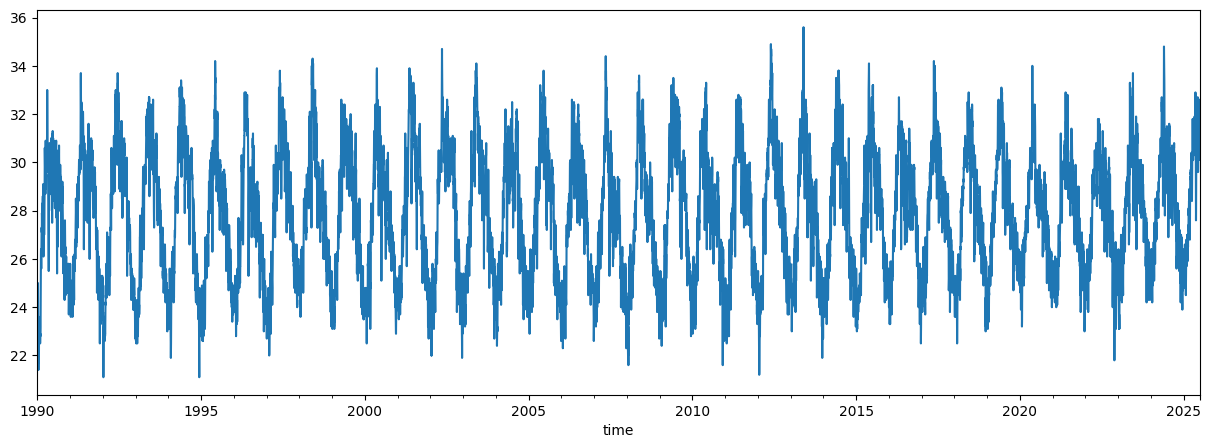

In [43]:
weather["temperature_2m_mean (°C)"].plot(figsize=(15,5))
plt.show()

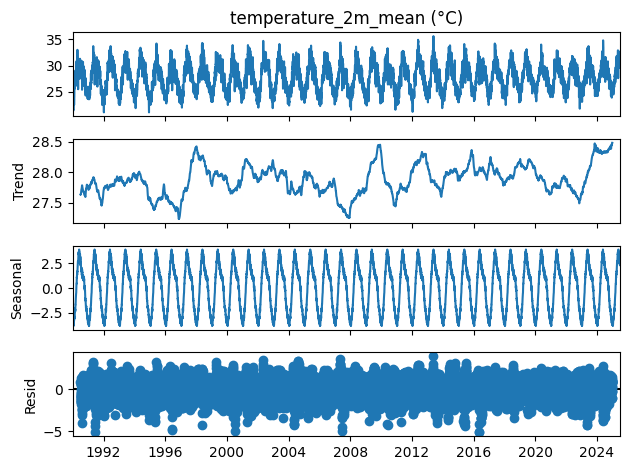

In [44]:
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

result = seasonal_decompose(weather["temperature_2m_mean (°C)"], model="additive", period=365)
result.plot()
plt.show()

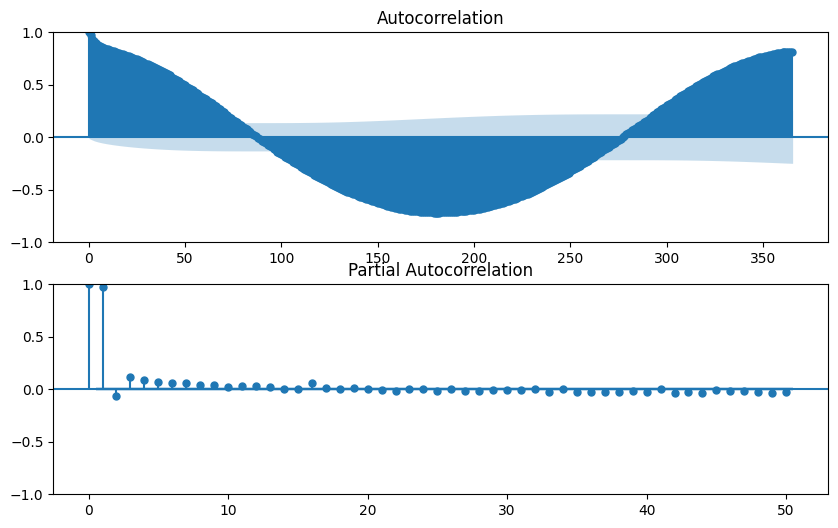

In [45]:
series = weather["temperature_2m_mean (°C)"]

fig, ax = plt.subplots(2, 1, figsize=(10,6))
plot_acf(series, lags=365, ax=ax[0])   
plot_pacf(series, lags=50, ax=ax[1])   
plt.show()


In [46]:
weather.head()

,temperature_2m_max (°C),temperature_2m_min (°C),weather_code (wmo code),wind_speed_10m_max (km/h),cloud_cover_mean (%),relative_humidity_2m_mean (%),pressure_msl_mean (hPa),cloud_cover_max (%),dew_point_2m_mean (°C),temperature_2m_mean (°C),apparent_temperature_mean (°C),wind_speed_10m_mean (km/h),precipitation_sum (mm)
time,,,,,,,,,,,,,
1990-01-01,26.6,23.5,51,17.2,65,84,1012.2,100,21.8,24.7,27.9,11.3,1.3
1990-01-02,27.1,22.4,51,17.4,35,79,1012.7,67,20.5,24.5,26.9,12.5,0.1
1990-01-03,27.4,22.5,51,19.2,47,76,1013.9,84,20.0,24.7,26.4,14.6,0.1
1990-01-04,26.9,23.1,3,23.7,63,76,1015.2,100,20.0,24.6,25.9,18.0,0.0
1990-01-05,26.8,22.2,3,29.8,72,71,1015.5,99,18.7,24.5,24.5,22.1,0.0


### Data cleaning

C:\Users\TC Admin\AppData\Local\Temp\ipykernel_8664\2210507580.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)


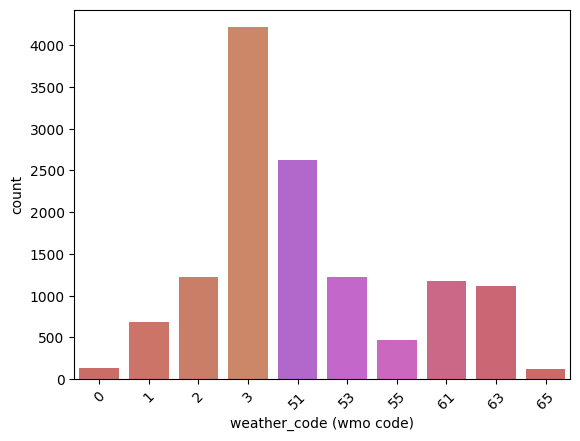

In [47]:
ax = sns.countplot(
    x="weather_code (wmo code)", 
    data=weather, 
    hue="weather_code (wmo code)",
    palette="hls", 
    legend=False   
)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

plt.show()

In [48]:
weather[["temperature_2m_max (°C)","temperature_2m_min (°C)",'wind_speed_10m_max (km/h)','precipitation_sum (mm)','temperature_2m_mean (°C)',
        'dew_point_2m_mean (°C)','cloud_cover_max (%)','relative_humidity_2m_mean (%)','pressure_msl_mean (hPa)', 'cloud_cover_mean (%)',
        'apparent_temperature_mean (°C)']].describe()

,temperature_2m_max (°C),temperature_2m_min (°C),wind_speed_10m_max (km/h),precipitation_sum (mm),temperature_2m_mean (°C),dew_point_2m_mean (°C),cloud_cover_max (%),relative_humidity_2m_mean (%),pressure_msl_mean (hPa),cloud_cover_mean (%),apparent_temperature_mean (°C)
count,12966.000000,12966.000000,12966.000000,12966.000000,12966.000000,12966.000000,12966.000000,12966.000000,12966.000000,12966.000000,12966.000000
mean,31.828837,24.904527,18.356756,2.867646,27.889758,22.182369,88.493753,73.046738,1008.735524,61.960589,31.332855
std,3.325902,2.650919,4.233653,8.671642,2.592145,2.118883,20.141438,9.165689,3.833016,30.953615,3.303684
min,22.900000,15.200000,6.900000,0.000000,21.100000,14.600000,0.000000,36.000000,995.400000,0.000000,20.800000
25%,28.900000,23.200000,15.500000,0.000000,25.700000,20.800000,86.000000,68.000000,1005.600000,34.000000,28.700000
50%,32.000000,25.200000,18.200000,0.100000,28.100000,22.600000,100.000000,74.000000,1008.500000,66.000000,32.100000
75%,34.300000,26.900000,21.000000,1.900000,29.900000,23.800000,100.000000,79.000000,1011.900000,93.000000,33.875000
max,41.900000,31.600000,65.200000,255.800000,35.600000,27.200000,100.000000,94.000000,1018.400000,100.000000,39.100000


In [49]:
variables = ['temperature_2m_max (°C)',
 'temperature_2m_min (°C)',
 'wind_speed_10m_max (km/h)',
 'cloud_cover_mean (%)',
 'relative_humidity_2m_mean (%)',
 'pressure_msl_mean (hPa)',
 'cloud_cover_max (%)',
 'dew_point_2m_mean (°C)',
 'temperature_2m_mean (°C)',
 'apparent_temperature_mean (°C)',
 'wind_speed_10m_mean (km/h)',
 'precipitation_sum (mm)','weather_code (wmo code)']

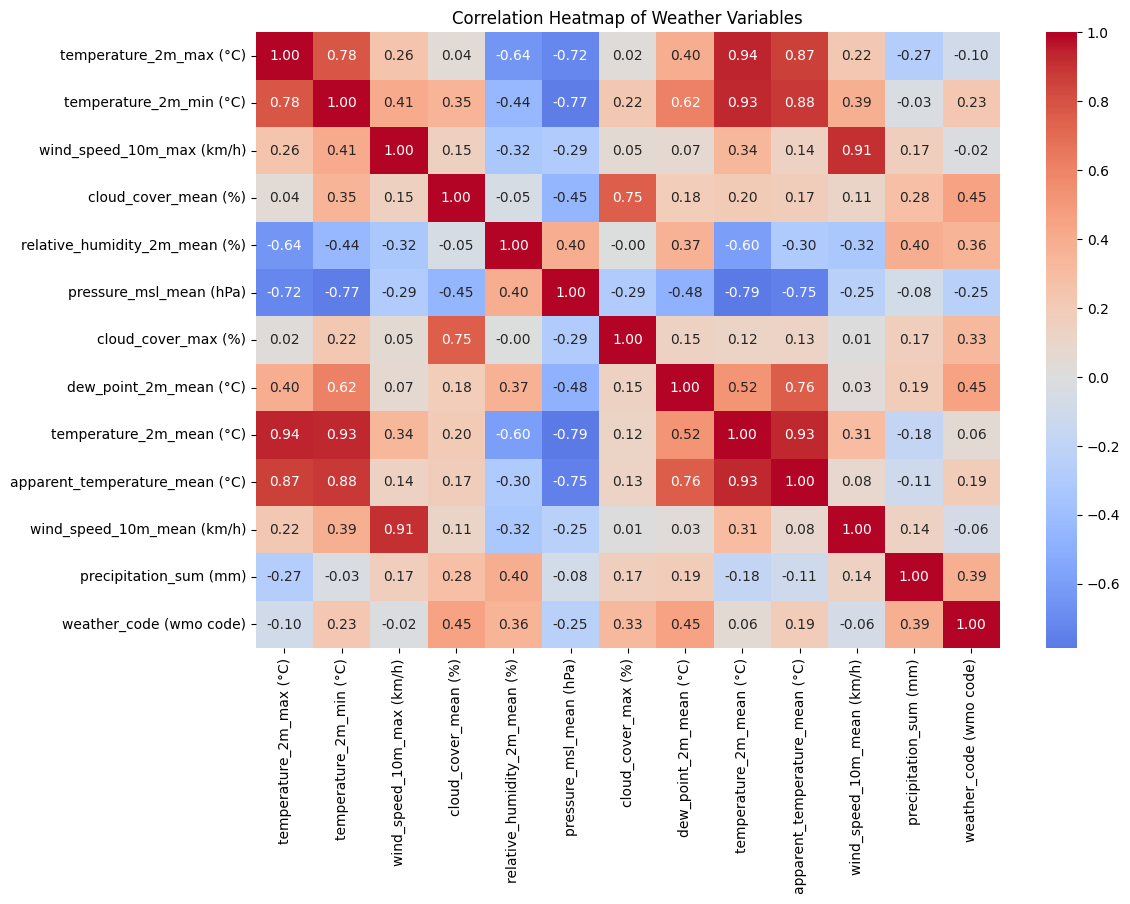

In [50]:
corr = weather[variables].corr()   
plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, cmap="coolwarm", center=0, fmt=".2f")
plt.title("Correlation Heatmap of Weather Variables")
plt.show()

In [51]:
weather = weather.drop(columns=[
    'temperature_2m_max (°C)',
    'temperature_2m_min (°C)',
    'apparent_temperature_mean (°C)',
    'wind_speed_10m_max (km/h)',
    'wind_speed_10m_mean (km/h)'
])

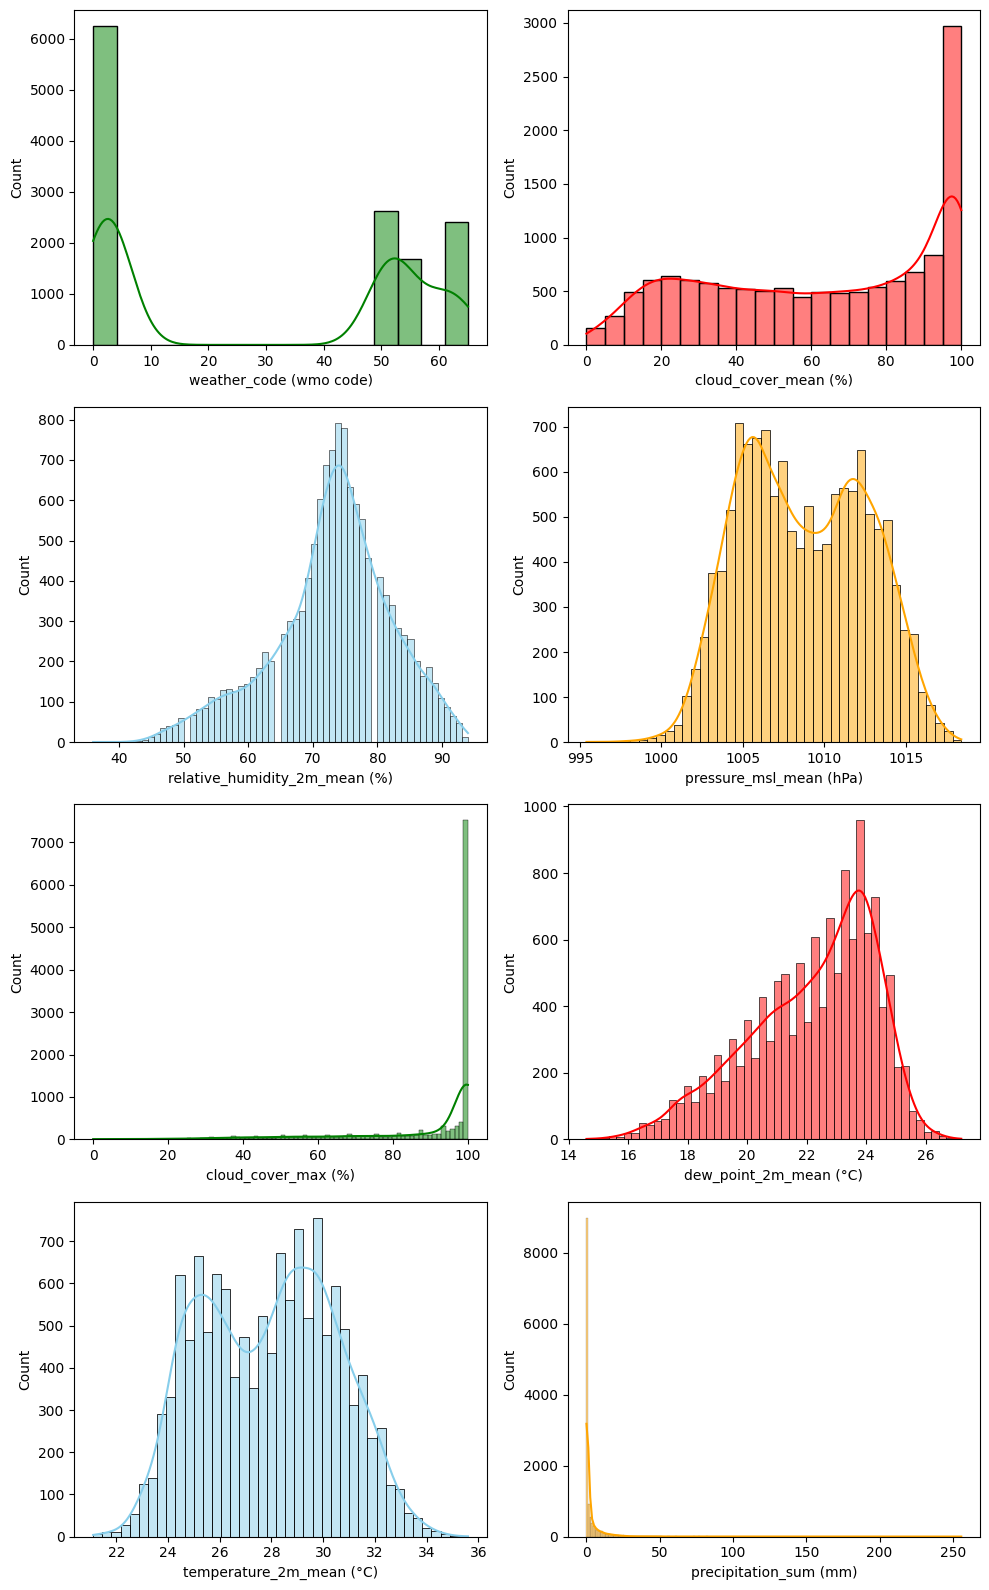

In [52]:
import math

n_cols = 2
n_rows = math.ceil(len(weather.columns) / n_cols)

fig, axs = plt.subplots(n_rows, n_cols, figsize=(10, n_rows*4))
axs = axs.flatten()  
colors = ['green', 'red', 'skyblue', 'orange']

for i, column in enumerate(weather.columns):
    sns.histplot(data=weather, x=column, kde=True, 
                 ax=axs[i], color=colors[i % len(colors)])

plt.tight_layout()
plt.show()


### Data Processing

In [53]:
Q1 = weather.quantile(0.25)
Q3 = weather.quantile(0.75)
IQR = Q3 - Q1
weather , _ = weather.align((Q1 - 1.5 * IQR) | (weather > (Q3 + 1.5 * IQR)), axis=1, copy=False)

In [54]:
from sklearn.preprocessing import StandardScaler

weather["precipitation_sum (mm)"] = np.log1p(weather["precipitation_sum (mm)"])

X = weather.drop("weather_code (wmo code)", axis=1)
y = weather["weather_code (wmo code)"]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [55]:
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

print(X_scaled_df.mean().round(2))   
print(X_scaled_df.std().round(2))    

cloud_cover_mean (%)             0.0
relative_humidity_2m_mean (%)    0.0
pressure_msl_mean (hPa)         -0.0
cloud_cover_max (%)              0.0
dew_point_2m_mean (°C)           0.0
temperature_2m_mean (°C)         0.0
precipitation_sum (mm)          -0.0
dtype: float64
cloud_cover_mean (%)             1.0
relative_humidity_2m_mean (%)    1.0
pressure_msl_mean (hPa)          1.0
cloud_cover_max (%)              1.0
dew_point_2m_mean (°C)           1.0
temperature_2m_mean (°C)         1.0
precipitation_sum (mm)           1.0
dtype: float64


In [56]:
weather = weather.sort_index()

lag_features = ["temperature_2m_mean (°C)", "relative_humidity_2m_mean (%)", 
                "pressure_msl_mean (hPa)", "precipitation_sum (mm)", 
                "cloud_cover_mean (%)"]

for col in lag_features:
    weather[f"{col}_lag1"] = weather[col].shift(1)
    weather[f"{col}_lag7"] = weather[col].shift(7)

for col in lag_features:
    weather[f"{col}_rollmean3"] = weather[col].shift(1).rolling(3).mean()

weather = weather.dropna().reset_index(drop=True)
weather.head()

,weather_code (wmo code),cloud_cover_mean (%),relative_humidity_2m_mean (%),pressure_msl_mean (hPa),cloud_cover_max (%),dew_point_2m_mean (°C),temperature_2m_mean (°C),precipitation_sum (mm),temperature_2m_mean (°C)_lag1,temperature_2m_mean (°C)_lag7,...,pressure_msl_mean (hPa)_lag7,precipitation_sum (mm)_lag1,precipitation_sum (mm)_lag7,cloud_cover_mean (%)_lag1,cloud_cover_mean (%)_lag7,temperature_2m_mean (°C)_rollmean3,relative_humidity_2m_mean (%)_rollmean3,pressure_msl_mean (hPa)_rollmean3,precipitation_sum (mm)_rollmean3,cloud_cover_mean (%)_rollmean3
0,3,78,72,1015.7,100,19.4,25.0,0.0,24.4,24.7,...,1012.2,2.104134,0.832909,84.0,65.0,24.466667,75.333333,1015.000000,1.451809,84.000000
1,2,38,72,1015.4,67,18.8,24.3,0.0,25.0,24.5,...,1012.7,0.000000,0.095310,78.0,35.0,24.633333,75.666667,1015.066667,1.451809,86.000000
2,1,18,77,1014.7,48,19.5,23.9,0.0,24.3,24.7,...,1013.9,0.000000,0.095310,38.0,47.0,24.566667,74.666667,1015.266667,0.701378,66.666667
3,2,9,81,1014.6,67,19.3,22.9,0.0,23.9,24.6,...,1015.2,0.000000,0.000000,18.0,63.0,24.400000,73.666667,1015.266667,0.000000,44.666667
4,3,44,77,1014.2,100,17.5,22.3,0.0,22.9,24.5,...,1015.5,0.000000,0.000000,9.0,72.0,23.700000,76.666667,1014.900000,0.000000,21.666667


## Split

In [57]:
train = weather.loc[:'2017-05-31'].copy()
test  = weather.loc['2017-06-01':].copy()

predictors = [col for col in weather.columns if col != 'weather_code (wmo code)']

X_train = train[predictors].copy()
y_train = train['weather_code (wmo code)'].astype(int).copy()

X_test  = test[predictors].copy()
y_test  = test['weather_code (wmo code)'].astype(int).copy()


## Random Forest Classifier

In [58]:
from sklearn.ensemble import RandomForestClassifier

In [59]:
rf = RandomForestClassifier(random_state = 42)

In [60]:
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)

In [61]:
rf.score(X_test, y_test)

0.8064162325198794

In [62]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.89      0.93        89
           1       0.98      0.98      0.98       516
           2       0.99      1.00      1.00      1003
           3       1.00      1.00      1.00      3572
          51       0.77      0.96      0.85      2228
          53       0.46      0.31      0.37      1046
          55       0.15      0.03      0.04       389
          61       0.46      0.53      0.49       999
          63       0.62      0.67      0.64       982
          65       1.00      0.01      0.02       117

    accuracy                           0.81     10941
   macro avg       0.74      0.64      0.63     10941
weighted avg       0.79      0.81      0.79     10941



In [63]:
features = pd.DataFrame(rf.feature_importances_, index = X_train.columns)

In [64]:
features.head(22)

,0
cloud_cover_mean (%),0.076697
relative_humidity_2m_mean (%),0.032576
pressure_msl_mean (hPa),0.023601
cloud_cover_max (%),0.171900
dew_point_2m_mean (°C),0.036942
temperature_2m_mean (°C),0.025625
precipitation_sum (mm),0.270638
temperature_2m_mean (°C)_lag1,0.022346
temperature_2m_mean (°C)_lag7,0.022604
relative_humidity_2m_mean (%)_lag1,0.020104


In [65]:
rf2 = RandomForestClassifier(
    n_estimators=1000,
    criterion='entropy',
    min_samples_split=10,
    max_depth=14,
    random_state=42,
    class_weight="balanced" 
)

In [66]:
rf2.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=14, min_samples_split=10, n_estimators=1000,
                       random_state=42)

In [67]:
rf2.score(X_test, y_test)

0.8096152088474545

In [68]:
y_pred2 = rf2.predict(X_test)

In [69]:
print(classification_report(y_test, y_pred2))

              precision    recall  f1-score   support

           0       0.99      0.90      0.94        89
           1       0.98      1.00      0.99       516
           2       1.00      1.00      1.00      1003
           3       1.00      1.00      1.00      3572
          51       0.82      0.93      0.87      2228
          53       0.49      0.35      0.41      1046
          55       0.16      0.11      0.13       389
          61       0.48      0.48      0.48       999
          63       0.60      0.74      0.66       982
          65       0.58      0.06      0.11       117

    accuracy                           0.81     10941
   macro avg       0.71      0.66      0.66     10941
weighted avg       0.80      0.81      0.80     10941



## XGBoost

In [70]:
import xgboost as xgb

In [71]:
le = LabelEncoder()
y_train_enc = le.fit_transform(y_train)
y_test_enc = le.transform(y_test)

In [72]:
xgb_classifier = xgb.XGBClassifier(random_state = 42)

In [73]:
xgb_classifier.fit(X_train ,y_train_enc)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)

In [74]:
y_pred_enc = xgb_classifier.predict(X_test)

In [75]:
xgb_classifier.score(X_test, y_test_enc)

0.8160131615026048

In [76]:
y_pred2 = le.inverse_transform(y_pred_enc)
print(classification_report(y_test, y_pred2))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99        89
           1       1.00      1.00      1.00       516
           2       1.00      1.00      1.00      1003
           3       1.00      1.00      1.00      3572
          51       0.85      0.90      0.87      2228
          53       0.48      0.43      0.45      1046
          55       0.16      0.10      0.12       389
          61       0.49      0.55      0.52       999
          63       0.64      0.71      0.67       982
          65       0.58      0.15      0.24       117

    accuracy                           0.82     10941
   macro avg       0.72      0.68      0.69     10941
weighted avg       0.81      0.82      0.81     10941



## Hyperparameter Tuning Optuna

In [77]:
import optuna
from sklearn.model_selection import cross_val_score, StratifiedKFold

In [78]:
def objective(trial):
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 100, 1000),
        'learning_rate': trial.suggest_float('learning_rate', 1e-3, 0.3, log=True),
        'max_depth': trial.suggest_int('max_depth', 3, 12),
        'min_child_weight': trial.suggest_int('min_child_weight', 1, 8),
        'subsample': trial.suggest_float('subsample', 0.5, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.5, 1.0),
        'gamma': trial.suggest_float('gamma', 0, 5),
        'reg_alpha': trial.suggest_float('reg_alpha', 1e-8, 10.0, log=True),
        'reg_lambda': trial.suggest_float('reg_lambda', 1e-8, 2.0, log=True),
        'random_state': 42,
        'tree_method': 'hist',
        'objective': 'multi:softprob',  # Change to 'binary:logistic' for binary
        'eval_metric': 'mlogloss',      # or 'logloss' for binary
        'num_class': len(np.unique(y_train_enc)),  # Ensure correct class count for multiclass
    }
    model = xgb.XGBClassifier(**params)
    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    scores = cross_val_score(
        model, X_train, y_train_enc, cv=cv, scoring='accuracy', n_jobs=-1
    )
    return scores.mean()

study = optuna.create_study(direction='maximize', sampler=optuna.samplers.TPESampler(seed=42))
study.optimize(objective, n_trials=100)

best_params = study.best_params
print(f"Best Hyperparameters: {best_params}")
best_score = study.best_value
print(f"Best Accuracy: {best_score:.3f}")


[I 2025-09-06 15:23:23,415] A new study created in memory with name: no-name-a766d701-836c-483a-bfea-98952e8ad664
[I 2025-09-06 15:23:32,879] Trial 0 finished with value: 0.8404441933027049 and parameters: {'n_estimators': 437, 'learning_rate': 0.22648248189516848, 'max_depth': 10, 'min_child_weight': 5, 'subsample': 0.5780093202212182, 'colsample_bytree': 0.5779972601681014, 'gamma': 0.2904180608409973, 'reg_alpha': 0.6245760287469893, 'reg_lambda': 0.0009769531630295122}. Best is trial 0 with value: 0.8404441933027049.
[I 2025-09-06 15:23:44,137] Trial 1 finished with value: 0.8444009041102621 and parameters: {'n_estimators': 737, 'learning_rate': 0.001124579825911934, 'max_depth': 12, 'min_child_weight': 7, 'subsample': 0.6061695553391381, 'colsample_bytree': 0.5909124836035503, 'gamma': 0.9170225492671691, 'reg_alpha': 5.472429642032198e-06, 'reg_lambda': 0.00022699635282715677}. Best is trial 1 with value: 0.8444009041102621.
[I 2025-09-06 15:23:49,049] Trial 2 finished with value

Best Hyperparameters: {'n_estimators': 650, 'learning_rate': 0.004274144507877061, 'max_depth': 5, 'min_child_weight': 1, 'subsample': 0.7028450704349263, 'colsample_bytree': 0.7324639746012531, 'gamma': 1.8553896007643753, 'reg_alpha': 0.07686591021291286, 'reg_lambda': 8.963763682604493e-08}
Best Accuracy: 0.854


In [79]:
# Update with best hyperparameters
xgb2 = xgb.XGBClassifier(
    **best_params,
    random_state=42,
    tree_method="hist", 
    eval_metric="mlogloss",
    num_class=len(np.unique(y_train_enc))
)

# Fit on full training data
xgb2.fit(X_train, y_train_enc)

y_pred_enc_2 = xgb2.predict(X_test)

y_pred_final = le.inverse_transform(y_pred_enc_2)
print(classification_report(y_test, y_pred_final))


              precision    recall  f1-score   support

           0       0.99      1.00      0.99        89
           1       1.00      1.00      1.00       516
           2       1.00      1.00      1.00      1003
           3       1.00      1.00      1.00      3572
          51       0.84      0.93      0.88      2228
          53       0.53      0.44      0.48      1046
          55       0.14      0.02      0.04       389
          61       0.50      0.55      0.52       999
          63       0.63      0.81      0.71       982
          65       0.80      0.03      0.07       117

    accuracy                           0.83     10941
   macro avg       0.74      0.68      0.67     10941
weighted avg       0.81      0.83      0.81     10941



In [80]:
xgb2.score(X_test, y_test_enc)

0.8285348688419706

In [81]:
features = pd.DataFrame(xgb2.feature_importances_, index = X_train.columns)

In [82]:
features.head(22)

,0
cloud_cover_mean (%),0.072159
relative_humidity_2m_mean (%),0.031165
pressure_msl_mean (hPa),0.023336
cloud_cover_max (%),0.257860
dew_point_2m_mean (°C),0.027884
temperature_2m_mean (°C),0.030138
precipitation_sum (mm),0.164018
temperature_2m_mean (°C)_lag1,0.031390
temperature_2m_mean (°C)_lag7,0.023397
relative_humidity_2m_mean (%)_lag1,0.019912


### Balancing Imbalanced classes

In [83]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=42, sampling_strategy="auto")  
X_res, y_res = sm.fit_resample(X_train, y_train_enc)
print("Before SMOTE:", X_train.shape, pd.Series(y_train_enc).value_counts())
print("After SMOTE:", X_res.shape, pd.Series(y_res).value_counts())

Before SMOTE: (2018, 22) 3    640
4    388
2    218
5    178
7    171
1    165
8    133
6     77
0     41
9      7
Name: count, dtype: int64
After SMOTE: (6400, 22) 3    640
2    640
1    640
0    640
4    640
7    640
5    640
6    640
8    640
9    640
Name: count, dtype: int64


In [84]:
xgb3 = xgb.XGBClassifier(
    **best_params,
    random_state=42,
    tree_method="hist", 
    eval_metric="mlogloss",
    objective="multi:softprob", 
    num_class=len(np.unique(y_train_enc))
)

In [85]:
xgb3.fit(X_res, y_res)

y_pred_res = xgb3.predict(X_test)

In [86]:
y_pred_res_final = le.inverse_transform(y_pred_res)
print(classification_report(y_test, y_pred_res_final))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99        89
           1       1.00      1.00      1.00       516
           2       1.00      1.00      1.00      1003
           3       1.00      1.00      1.00      3572
          51       0.91      0.86      0.88      2228
          53       0.54      0.51      0.52      1046
          55       0.21      0.34      0.26       389
          61       0.50      0.38      0.43       999
          63       0.62      0.77      0.69       982
          65       0.41      0.22      0.29       117

    accuracy                           0.81     10941
   macro avg       0.72      0.71      0.71     10941
weighted avg       0.82      0.81      0.82     10941



## API

In [87]:
joblib.dump(xgb2, "weather_model.pkl")
joblib.dump(le, "label_encoder.pkl")

['label_encoder.pkl']